## Explainable uplift modelling
### Introduction
Imagine you are a businessman running your own company - who wouldn't like to be?
Of course you want to maximize profits and cut down costs but often finding the tradeoff is not an easy task.
Here comes Machine Learning and uplift models that can help you in optimizing marketing costs.
You may ask yourself sometimes whether it makes sense to address marketing campaigns to all your customers. 
From one point of view by sending an offer you think the probability that the customer will buy your product is higher - in fact it is not always the cases 
(we will go back to the matter in a moment).
On the other hand, making large-scale campaign is costly. It would be good to know what is the return of investment. 

Much food for thought was presented, we will try in this chapter to clarify the topic.

First - is it true that by sending the marketing offer we only extend the chance for the customer to buy our product and therefore extend out profit?
The issue was already investigated [cite] and it was pointed out that customers of any company can be divided into 4 groups. [wkleić obrazek]
In the picture it can be seen that there is a clear division on a customers that received/didn't receive the treatment (in our case marketing materials) and the ones that later 
on bought/didn't buy the product. [tutaj opiszę w większych szczegółach cztery kategorie]

### Scoring
- Uplfit itself: P(PUCHASE|TREATMENT=1) - P(PURCHASE|TREATMENT=0)
- Problem with lack of proper Y to score the model in a usual way
- Cumulative Gains and Lift Curves

### Calculating instance-level variable importance 
Using _additive feature attribution_ property of __shapley values__ to model the _uplift_:

`
SHAP(P(PUCHASE|TREATMENT=1) - P(PURCHASE|TREATMENT=0)) =
SHAP(P(PUCHASE|TREATMENT=1)) - SHAP(P(PUCHASE|TREATMENT=0))
`

This gives us great opportunity to evaluate these two vectors of __shapley values__ independently. For example if we use any tree-based model, we can make use of tree-based kernel for shapley value estimation (faster and better convergent) instead of modelling it directly as a black blox model returning difference between two regressors.

Experimental results proved, that these two ways of calulcation are providing close estimations, with precision to numerical errors.

### Calculating Variable Importance
Unfortunately, its impossible to calculate directly _Permutation Feature Importance_, because of the previously mentioned problem with lack of full information in both cases: Will the client make the purchse after treatment, and will he without it. Because of having in disposal only historical data (not an oracle), we have only one of these two informations. 
However, we can make use of the previously computed __shapley values__ of uplift to calculate the same value of permutational feature importance as an average of local shapley importance (defined in a permutational way itself, however calculated in a smarter manner, more in [https://arxiv.org/pdf/1705.07874.pdf]).  

In [2]:
from data import X_train, Y_train, X_valid, Y_valid, treatment_col, column_names
from model import local_search_xgb, train_logistic, evaluate_uplift, train_xgb_model
from explanations import shapley_diff

In [3]:
xgbmodel = local_search_xgb(X_train, Y_train, X_valid, Y_valid, treatment_col, just_get_model=True)
#xgbmodel = train_xgb_model(X_train, Y_train, X_valid, Y_valid)

0.0594653287098299

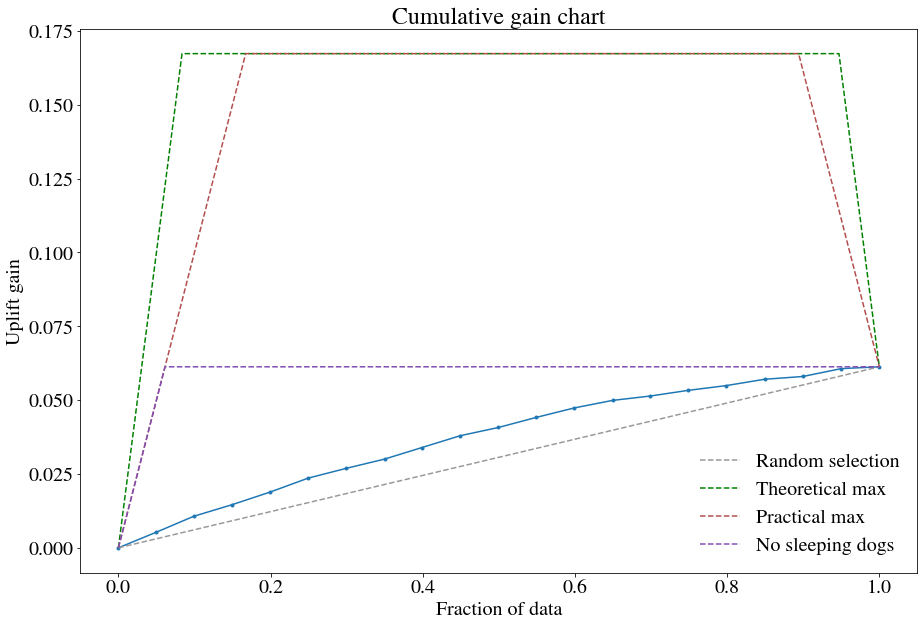

In [4]:
evaluate_uplift(xgbmodel, X_train, Y_train, treatment_col, plot=True)

0.03389569138409081

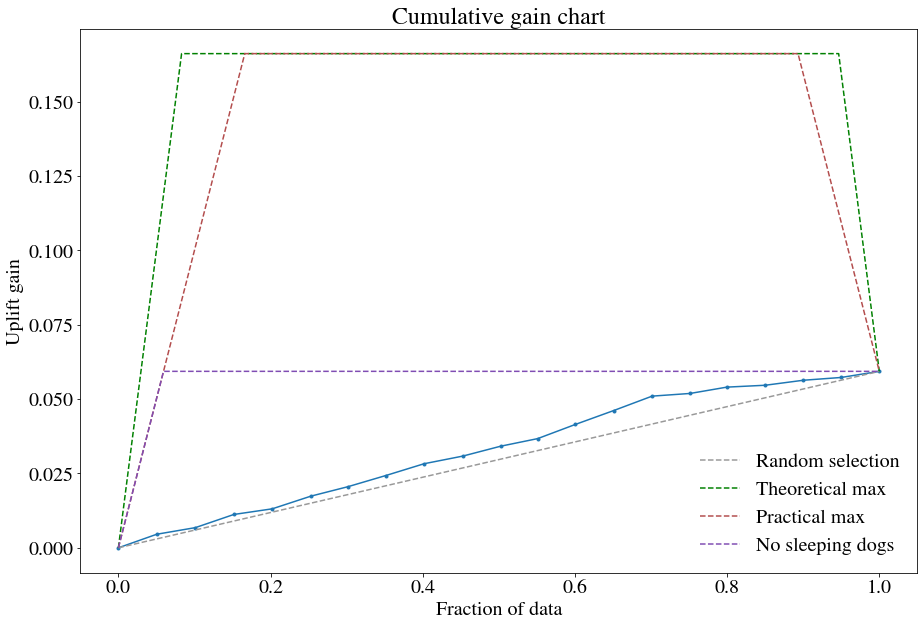

In [5]:
evaluate_uplift(xgbmodel, X_valid, Y_valid, treatment_col, plot=True)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


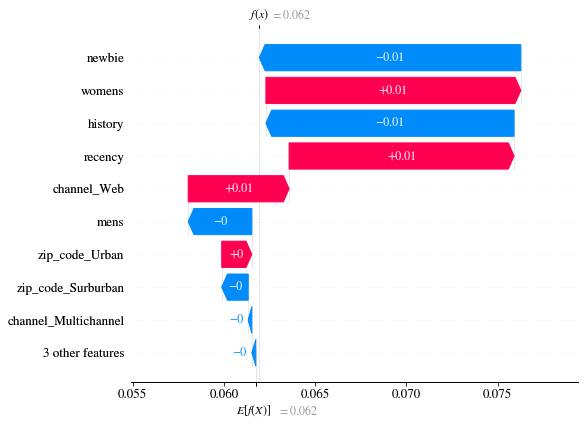

(array([ 1.23364371e-02, -1.36097250e-02, -3.48723912e-03,  1.39803331e-02,
        -1.45166802e-03, -1.43075391e-05,  1.64914032e-03, -1.43410872e-02,
        -1.02248137e-04,  5.53339285e-03, -1.97682931e-04, -1.03545769e-04]),
 0.061746419109404066)

In [6]:
shapley_diff(xgbmodel, X_valid[2,:], X_valid, column_names, treatment_col)